# **Librerias**

In [1]:
# Importamos 

import math
import scipy
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import root_scalar
from scipy.special import beta as betafn, gamma as gammafn, gammaln as gammalnfn, digamma as digammafn
from scipy.stats import bernoulli, geom, poisson, norm, beta, skew, kurtosis, beta, gamma, norm, gaussian_kde

# Version 

print(f'Numpy Version: {np.__version__}')
print(f'Scipy Version: {scipy.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')

Numpy Version: 2.0.2
Scipy Version: 1.13.1
Matplotlib Version: 3.9.4


# **Maximum Likelihood Estimation (MLE)** 

El objetivo de la **estimación por máxima verosimilitud** es encontrar los **parámetros desconocidos** $\theta$ de un **modelo probabilístico** que hacen más probable haber observado un conjunto de datos dado.

Supongamos que observamos una **muestra de datos** $x_1, x_2, \dots, x_n$ generada por una variable aleatoria $X$ con **función de probabilidad** (PMF o PDF) $f(x \mid \theta)$, donde $\theta$ representa los parámetros del modelo.

**Asumimos que los datos son:**

* Independientes 

* Idénticamente distribuidos (IID), es decir, cada $X_i \sim f(x \mid \theta)$.

Bajo esta suposición, la **función de verosimilitud** (likelihood function) es:

$$L(\theta) = \prod_{i = 1}^n f(X_i = x_i \mid \theta)$$

Esta función mide cuán verosímil es un valor de $\theta$ dado que hemos observado los datos $x_1, \dots, x_n$. El estimador de máxima verosimilitud es el valor de $\theta$ que maximiza esta función:

$$\hat{\theta}_{MLE} = \text{argmax}_{\theta} L(\theta) = \text{argmax}_{\theta} \prod_{i = 1}^n f(X_i = x_i \mid \theta)$$

**Maximización del log-verosimilitud**: Debido a que el logaritmo es una función monótonamente creciente, maximizar la verosimilitud es equivalente a maximizar su logaritmo:

$$LL(\theta) = \log L(\theta) = \sum_{i = 1}^n  \log f(X_i = x_i \mid \theta)$$
$$\hat{\theta}_{MLE} = \text{argmax}_{\theta} LL(\theta) = \text{argmax}_{\theta} \sum_{i = 1}^n  \log f(X_i = x_i \mid \theta)$$


**Nota:** El término **verosimilitud** (likelihood) no es lo mismo que **probabilidad**. Mientras que $f(x \mid \theta)$ se interpreta como la **probabilidad de los datos dado el parámetro**, $L(\theta)$ se interpreta como la **verosimilitud del parámetro dado los datos observados.**

### **Bernoulli**

**Simbologia** 

$$X \sim \text{Bern}(p)$$

**Funcion de Masa de Probabilidad (PMF)**

$$f(x) = P(X = x) = p^x \cdot (1 - p)^{1 - x}$$ 

**Verosimilitud** 

$$L(p) = \prod_i^n p^{x_i} \cdot (1 - p)^{1 - x_i}$$

**Log-Verosimilitud** 

$$LL(p) = \sum_i^n \log \left(p^{x_i} \cdot (1 - p)^{1 - x_i}\right)$$
$$LL(p) = \sum_i^n \log p^{x_i} + \log (1 - p)^{1 - x_i}$$
$$LL(p) = \sum_i^n x_i \log p + (1 - x_i) \log (1 - p)$$
$$LL(p) = \sum_i^n x_i \log p + \sum_i^n (1 - x_i) \log (1 - p)$$

**Definimos** 

$$z = \sum_i^n x_i$$

**Entonces**

$$LL(p) = z \log p + (n - z) \log (1 - p)$$

**Derivamos Pracialmente Respecto a los Parametros** 

$$\frac{\partial LL(p)}{\partial p} = \frac{z}{p} - \frac{n - z}{1 - p}$$

**Máxima verosimilitud** 

$$\hat{p}_{MLE} = \text{argmax}_{p} LL(p) \rightarrow \frac{\partial LL(p)}{\partial p} = 0$$

$$0 = \frac{z}{p} - \frac{n - z}{1 - p}$$
$$\hat{p} = \frac{1}{n} z$$
$$\hat{p} = \frac{1}{n} \sum_i^n x_i$$


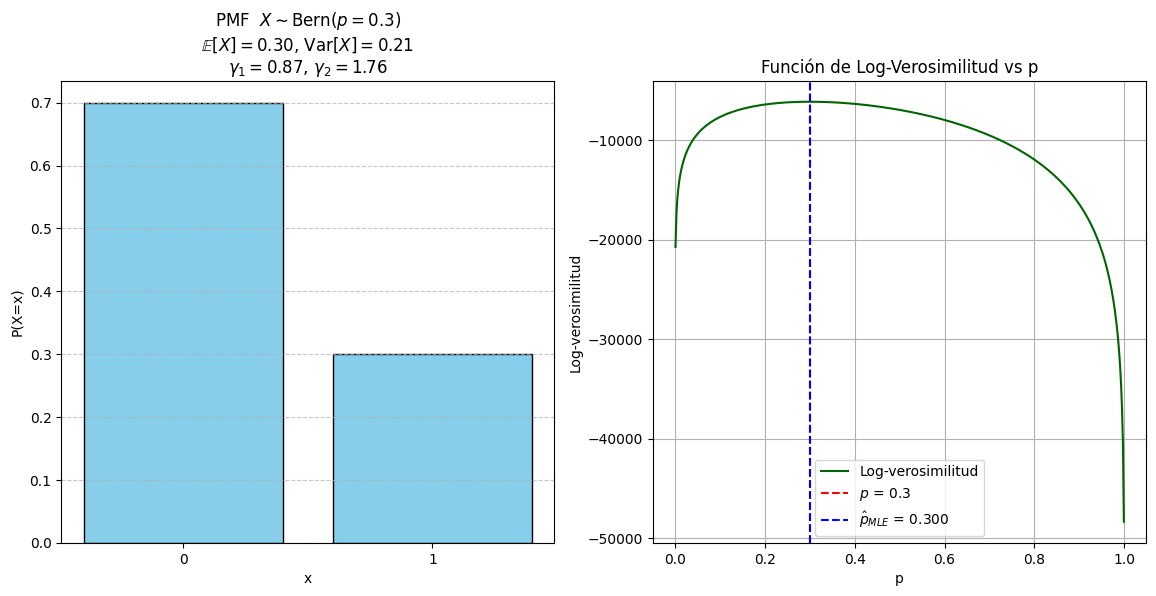

In [2]:
# Definimos los Parametros de la Distribucion

p_param = 0.3

# Definimos la Distribucion Aleatoria 

rv = bernoulli(p_param)

# Definimos el Dominio

x = np.array([0, 1])

# Generamos 10.000 Muestras Provenientes de la Distribucion (Simulamos el concepto IID)

samples = rv.rvs(size = 10000)

# Definimos las Funciones PMF apartir de las Muestras

pmf_vals = np.array([np.mean(samples == val) for val in x])

# Calculamos los Distintos Momentos

mean = np.mean(samples)
var = np.var(samples)
skewness = skew(samples)
kurt = kurtosis(samples, fisher = False)

# Definimos el Estimador de Parametro 

p_mle = np.mean(samples)

# Definimos la Funcion Log-Verosimilitud 

p_values = np.linspace(0.001, 0.999, 500)

log_likelihood = np.array([x * np.log(p_values) + (1 - x) * np.log(1 - p_values) for x in samples]).sum(axis = 0)

# Visualizamos

fig, axs = plt.subplots(1, 2, figsize = (14, 6))

axs[0].bar(x, pmf_vals, color = 'skyblue', edgecolor = 'black')
axs[0].set_title(f'PMF  $X \\sim \\text{{Bern}}(p={p_param})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skewness):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0].set_xticks(x)
axs[0].set_xlabel('x')
axs[0].set_ylabel('P(X=x)')
axs[0].grid(True, axis = 'y', linestyle = '--', alpha = 0.7)

axs[1].plot(p_values, log_likelihood, label = 'Log-verosimilitud', color = 'darkgreen')
axs[1].axvline(x = p_param, color = 'red', linestyle = '--', label = f'$p$ = {p_param}')
axs[1].axvline(x= p_mle, color = 'blue', linestyle = '--', label = f'$\hat{{p}}_{{MLE}}$ = {p_mle:.3f}')
axs[1].set_title('Función de Log-Verosimilitud vs p')
axs[1].set_xlabel('p')
axs[1].set_ylabel('Log-verosimilitud')
axs[1].legend()
axs[1].grid(True)

plt.show()

### **Geometrica** 

**Simbologia** 

$$X \sim \text{Geo}(p)$$

**Funcion de Masa de Probabilidad (PMF)**

$$f(x) = P(X = x) = p \cdot (1 - p)^{x-1}$$

**Verosimilitud** 

$$L(p) = \prod_i^n p \cdot (1 - p)^{x_i-1}$$

**Log-Verosimilitud** 

$$LL(p) = \sum_i^n \log \left(p \cdot (1 - p)^{x_i-1}\right)$$
$$LL(p) = \sum_i^n \log p + \log (1 - p)^{x_i-1}$$
$$LL(p) = \sum_i^n \log p + (x_i - 1) \log (1 - p)$$
$$LL(p) = \sum_i^n \log p + \sum_i^n (x_i - 1) \log (1 - p)$$

**Definimos** 

$$z = \sum_i^n x_i$$

**Entonces**

$$LL(p) = n \log p + (z - n) \log (1 - p)$$

**Derivamos Pracialmente Respecto a los Parametros** 

$$\frac{\partial LL(p)}{\partial p} = \frac{n}{p} - \frac{z - n}{1 - p}$$

**Máxima verosimilitud** 

$$\hat{p}_{MLE} = \text{argmax}_{p} LL(p) \rightarrow \frac{\partial LL(p)}{\partial p} = 0$$

$$0 = \frac{n}{p} - \frac{z - n}{1 - p}$$
$$\hat{p} = \frac{n}{z}$$
$$\hat{p} = \frac{n}{\sum_i^n x_i}$$

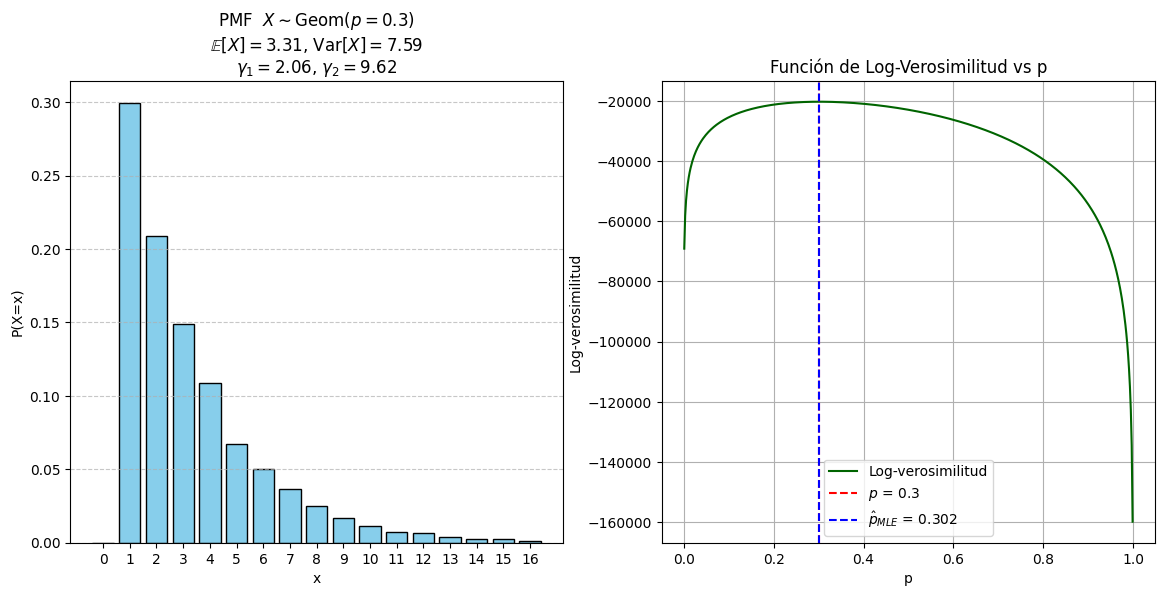

In [3]:
# Definimos los Parametros de la Distribucion

p_param = 0.3

# Definimos la Distribucion Aleatoria 

rv = geom(p_param)

# Definimos el Dominio

x = np.arange(0, 17)

# Generamos 10.000 Muestras Provenientes de la Distribucion (Simulamos el concepto IID)

samples = rv.rvs(size = 10000)

# Definimos las Funciones PMF apartir de las Muestras

pmf_vals = np.array([np.mean(samples == val) for val in x])

# Calculamos los Distintos Momentos

mean = np.mean(samples)
var = np.var(samples)
skewness = skew(samples)
kurt = kurtosis(samples, fisher = False)

# Definimos el Estimador de Parametro 

p_mle = len(samples) / np.sum(samples)

# Definimos la Funcion Log-Verosimilitud 

p_values = np.linspace(0.001, 0.999, 500)

log_likelihood = np.array([np.log(p_values) + (x - 1) * np.log(1 - p_values) for x in samples]).sum(axis = 0)

# Visualizamos

fig, axs = plt.subplots(1, 2, figsize = (14, 6))

axs[0].bar(x, pmf_vals, color = 'skyblue', edgecolor = 'black')
axs[0].set_title(f'PMF  $X \\sim \\text{{Geom}}(p={p_param})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skewness):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0].set_xticks(x)
axs[0].set_xlabel('x')
axs[0].set_ylabel('P(X=x)')
axs[0].grid(True, axis = 'y', linestyle = '--', alpha = 0.7)

axs[1].plot(p_values, log_likelihood, label = 'Log-verosimilitud', color = 'darkgreen')
axs[1].axvline(x = p_param, color = 'red', linestyle = '--', label = f'$p$ = {p_param}')
axs[1].axvline(x= p_mle, color = 'blue', linestyle = '--', label = f'$\hat{{p}}_{{MLE}}$ = {p_mle:.3f}')
axs[1].set_title('Función de Log-Verosimilitud vs p')
axs[1].set_xlabel('p')
axs[1].set_ylabel('Log-verosimilitud')
axs[1].legend()
axs[1].grid(True)

plt.show()

### **Poisson** 

**Simbologia** 

$$X \sim \text{Pois}(\lambda)$$

**Funcion de Masa de Probabilidad (PMF)**

$$f(x) = P(X = x) = \frac{\lambda^x \cdot e^{-\lambda}}{x!}$$

**Verosimilitud** 

$$L(\lambda) = \prod_i^n \frac{\lambda^{x_i} \cdot e^{-\lambda}}{x_i!}$$

**Log-Verosimilitud** 

$$LL(\lambda) = \sum_i^n \log \left(\frac{\lambda^{x_i} \cdot e^{-\lambda}}{x_i!}\right)$$


$$LL(\lambda) = \sum_i^n \log \lambda^{x_i} + \log e^{-\lambda} - \log x_i!$$
$$LL(\lambda) = \sum_i^n x_i \log \lambda - \lambda \log e - \log x_i!$$
$$LL(\lambda) = \sum_i^n x_i \log \lambda - \lambda - \log x_i!$$
$$LL(\lambda) = \sum_i^n x_i \log \lambda - \sum_i^n \lambda - \sum_i^n \log x_i!$$

**Definimos** 

$$z = \sum_i^n x_i$$

**Entonces**

$$LL(\lambda) = z \log \lambda - n \cdot \lambda - \sum_i^n \log x_i!$$

**Derivamos Pracialmente Respecto a los Parametros** 

$$\frac{\partial LL(\lambda)}{\partial \lambda} = \frac{z}{\lambda} - n$$

**Máxima verosimilitud** 

$$\hat{\lambda}_{MLE} = \text{argmax}_{\lambda} LL(\lambda) \rightarrow \frac{\partial LL(\lambda)}{\partial \lambda} = 0$$

$$0 = \frac{z}{\lambda} - n$$
$$\hat{\lambda} = \frac{z}{n}$$
$$\hat{\lambda} = \frac{1}{n} \sum_i^n x_i$$

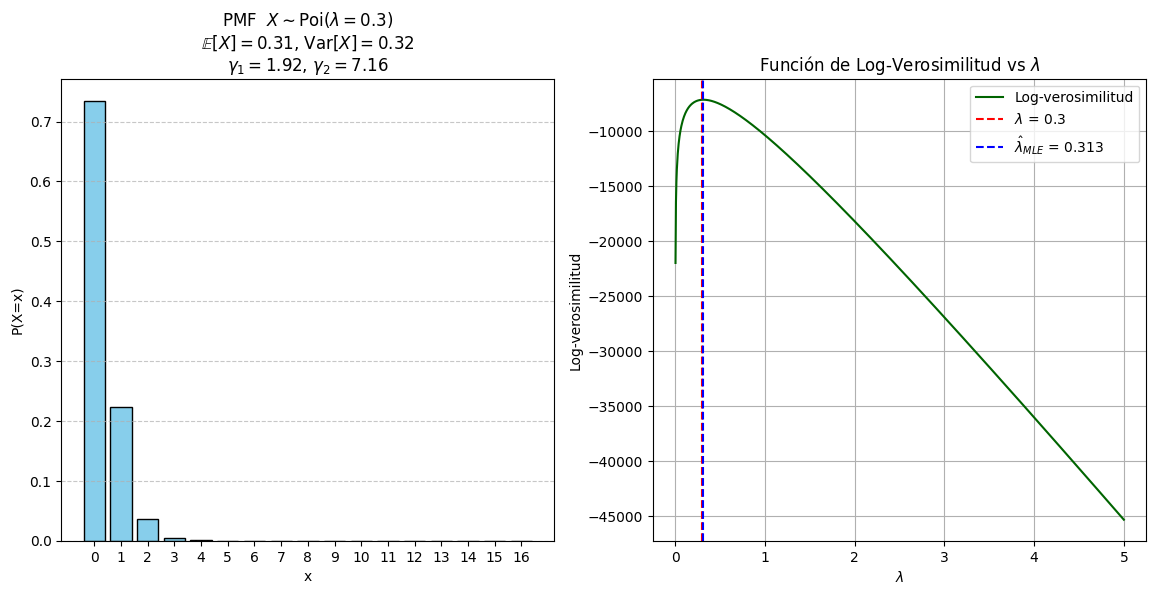

In [4]:
# Definimos los Parametros de la Distribucion

lambda_param = 0.3

# Definimos la Distribucion Aleatoria 

rv = poisson(lambda_param)

# Definimos el Dominio

x = np.arange(0, 17)

# Generamos 10.000 Muestras Provenientes de la Distribucion (Simulamos el concepto IID)

samples = rv.rvs(size = 10000)

# Definimos las Funciones PMF apartir de las Muestras

pmf_vals = np.array([np.mean(samples == val) for val in x])

# Calculamos los Distintos Momentos

mean = np.mean(samples)
var = np.var(samples)
skewness = skew(samples)
kurt = kurtosis(samples, fisher = False)

# Definimos el Estimador de Parametro 

lambda_mle = np.mean(samples)

# Definimos la Funcion Log-Verosimilitud 

lambda_values = np.linspace(0.001, 5, 1000)

log_likelihood = np.array([x * np.log(lambda_values) - lambda_values - np.log(math.factorial(x)) for x in samples]).sum(axis = 0)

# Visualizamos

fig, axs = plt.subplots(1, 2, figsize = (14, 6))

axs[0].bar(x, pmf_vals, color = 'skyblue', edgecolor = 'black')
axs[0].set_title(f'PMF  $X \\sim \\text{{Poi}}(\lambda={lambda_param})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skewness):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0].set_xticks(x)
axs[0].set_xlabel('x')
axs[0].set_ylabel('P(X=x)')
axs[0].grid(True, axis = 'y', linestyle = '--', alpha = 0.7)

axs[1].plot(lambda_values, log_likelihood, label = 'Log-verosimilitud', color = 'darkgreen')
axs[1].axvline(x = lambda_param, color = 'red', linestyle = '--', label = f'$\lambda$ = {lambda_param}')
axs[1].axvline(x= lambda_mle, color = 'blue', linestyle = '--', label = f'$\hat{{\lambda}}_{{MLE}}$ = {lambda_mle:.3f}')
axs[1].set_title('Función de Log-Verosimilitud vs $\lambda$')
axs[1].set_xlabel('$\lambda$')
axs[1].set_ylabel('Log-verosimilitud')
axs[1].legend()
axs[1].grid(True)

plt.show()

### **Continua** 

**Simbologia** 

$$X \sim {\displaystyle {\mathcal {N}}(\mu ,\sigma ^{2})}$$

**Funcion de Densidad de Probabilidad (PDF)**

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

**Verosimilitud** 

$$L(\mu, \sigma^2) = \prod_i^n \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}$$

**Log-Verosimilitud** 

$$LL(\mu, \sigma^2) = \sum_i^n \log \left(\frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}\right)$$
$$LL(\mu, \sigma^2) = \sum_i^n \log \frac{1}{\sqrt{2\pi\sigma^2}} + \log e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}$$
$$LL(\mu, \sigma^2) = \sum_i^n \log 1 - \log \sqrt{2\pi\sigma^2} - \frac{(x_i - \mu)^2}{2\sigma^2} \log e$$
$$LL(\mu, \sigma^2) = \sum_i^n - \log \sqrt{2\pi\sigma^2} - \frac{(x_i - \mu)^2}{2\sigma^2}$$
$$LL(\mu, \sigma^2) = \sum_i^n - \frac{1}{2} \log 2\pi\sigma^2 - \frac{(x_i - \mu)^2}{2\sigma^2}$$
$$LL(\mu, \sigma^2) = - \sum_i^n  \frac{1}{2} \log 2\pi\sigma^2 - \sum_i^n  \frac{(x_i - \mu)^2}{2\sigma^2}$$
$$LL(\mu, \sigma^2) = - \sum_i^n  \frac{1}{2} \log 2\pi\sigma^2 - \frac{1}{2\sigma^2} \sum_i^n  x_i^2 - 2x_i\mu + \mu^2$$
$$LL(\mu, \sigma^2) = - \sum_i^n  \frac{1}{2} \log 2\pi\sigma^2 - \frac{1}{2\sigma^2} \sum_i^n  x_i^2 - \sum_i^n  2x_i\mu + \sum_i^n \mu^2$$


**Definimos** 

$$z = \sum_i^n x_i$$
$$r = \sum_i^n x_i^2$$

**Entonces**

$$LL(\mu, \sigma^2) = - \frac{n}{2} \log 2\pi\sigma^2 - \frac{1}{2\sigma^2} \cdot (r - 2z\mu + n \mu^2)$$

**Derivamos Pracialmente Respecto a los Parametros** 

* Parametro: $\mu$ 

$$\frac{\partial LL(\mu, \sigma^2)}{\partial \mu} = - \frac{1}{2\sigma^2} \cdot (-2z + 2 n \mu)$$

* Parametro: $\sigma^2$ 

$$\frac{\partial LL(\mu, \sigma^2)}{\partial \sigma^2} = - \frac{n}{2\sigma^2} + \frac{2 \cdot (r - 2z\mu + n\mu^2)}{4\sigma^4}$$

**Máxima verosimilitud** 

* Parametro: $\mu$ 

$$\hat{\mu}_{MLE} = \text{argmax}_{\mu} LL(\mu, \sigma^2) \rightarrow \frac{\partial LL(\mu, \sigma)}{\partial \mu} = 0$$

$$0 = - \frac{1}{2\sigma^2} \cdot (-2z + 2 n \mu)$$
$$\mu = \frac{z}{n}$$
$$\mu = \frac{1}{n} \sum_i^n x_i$$

* Parametro: $\sigma^2$ 

$$\hat{\sigma^2}_{MLE} = \text{argmax}_{\sigma^2} LL(\mu, \sigma^2) \rightarrow \frac{\partial LL(\mu, \sigma)}{\partial \sigma^2} = 0$$

$$0 = - \frac{n}{2\sigma^2} + \frac{2 \cdot (r - 2z\mu + n\mu^2)}{4\sigma^4}$$
$$\sigma^2 = \frac{r - 2z\mu + n\mu^2}{n}$$
$$\sigma^2 = \frac{1}{n} \sum_i^n (x_i - \mu)^2$$


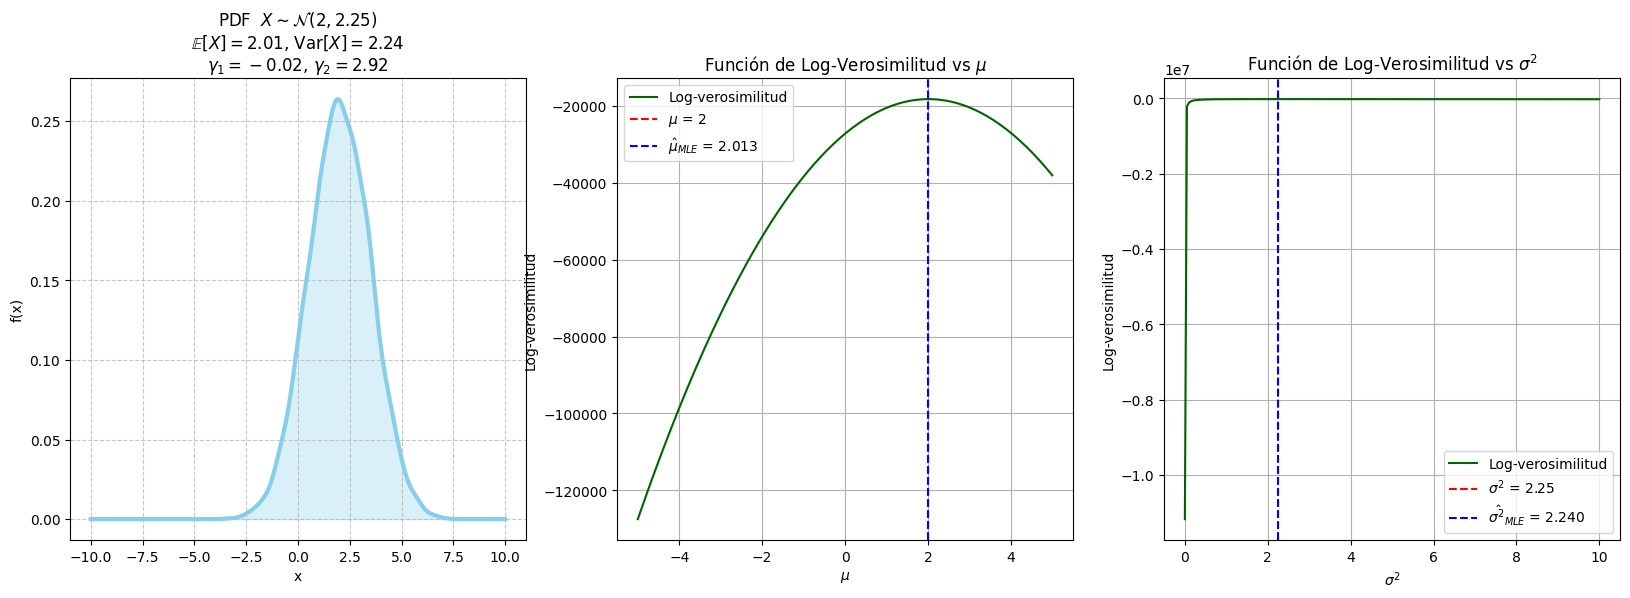

In [5]:
# Definimos los Parametros de la Distribucion

mu_param = 2
sigma_param = 1.5

# Definimos la Distribucion Aleatoria 

rv = norm(mu_param, sigma_param)

# Definimos el Dominio

x = np.linspace(-10, 10, 500)

# Generamos 10.000 Muestras Provenientes de la Distribucion (Simulamos el concepto IID)

samples = rv.rvs(size = 10000)

# Definimos las Funciones PMF apartir de las Muestras

kde = gaussian_kde(samples)
pdf_vals = kde(x)

# Calculamos los Distintos Momentos

mean = np.mean(samples)
var = np.var(samples)
skewness = skew(samples)
kurt = kurtosis(samples, fisher = False)

# Definimos el Estimador de Parametro 

mu_mle = np.mean(samples)
sigma_mle = np.var(samples, ddof = 0)

# Definimos la Funcion Log-Verosimilitud 

mu_values = np.linspace(-5, 5, 200)
sigma2_values = np.linspace(0.001, 10, 200)

log_likelihood_mu = np.array([-((1 / 2) * np.log(2 * np.pi * sigma_param**2)) - ((1 / (2 * sigma_param**2)) * (x**2 - 2 * x * mu_values + mu_values**2)) for x in samples]).sum(axis = 0)
log_likelihood_sigma2 = np.array([-((1 / 2) * np.log(2 * np.pi * sigma2_values)) - ((1 / (2 * sigma2_values)) * (x**2 - 2 * x * mu_param + mu_param**2)) for x in samples]).sum(axis = 0)

# Visualizamos

fig, axs = plt.subplots(1, 3, figsize = (20, 6))

axs[0].plot(x, pdf_vals, color = 'skyblue', lw = 3)
axs[0].fill_between(x, pdf_vals, color = 'skyblue', alpha = 0.3)
axs[0].set_title(f'PDF  $X \\sim \\mathcal{{N}}({mu_param}, {sigma_param**2})$\n' f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' f'$\\gamma_1={float(skewness):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].grid(True, linestyle = '--', alpha = 0.7)

axs[1].plot(mu_values, log_likelihood_mu, label = 'Log-verosimilitud', color = 'darkgreen')
axs[1].axvline(x = mu_param, color = 'red', linestyle = '--', label = f'$\mu$ = {mu_param}')
axs[1].axvline(x= mu_mle, color = 'blue', linestyle = '--', label = f'$\hat{{\mu}}_{{MLE}}$ = {mu_mle:.3f}')
axs[1].set_title('Función de Log-Verosimilitud vs $\mu$')
axs[1].set_xlabel('$\mu$')
axs[1].set_ylabel('Log-verosimilitud')
axs[1].legend()
axs[1].grid(True)

axs[2].plot(sigma2_values, log_likelihood_sigma2, label = 'Log-verosimilitud', color = 'darkgreen')
axs[2].axvline(x = sigma_param**2, color = 'red', linestyle = '--', label = f'$\sigma^2$ = {sigma_param**2}')
axs[2].axvline(x= sigma_mle, color = 'blue', linestyle = '--', label = f'$\hat{{\sigma^2}}_{{MLE}}$ = {sigma_mle:.3f}')
axs[2].set_title('Función de Log-Verosimilitud vs $\sigma^2$')
axs[2].set_xlabel('$\sigma^2$')
axs[2].set_ylabel('Log-verosimilitud')
axs[2].legend()
axs[2].grid(True)

plt.show()

### **Beta** 

**Simbologia** 

$$X \sim \text{Beta}(\alpha ,\beta)$$

**Funcion de Densidad de Probabilidad (PDF)**

$$f(x) = \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{{B(\alpha, \beta)}} = \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}}$$

**Verosimilitud** 

$$L(\alpha ,\beta) = \prod_i^n \frac{x_i^{\alpha - 1} (1 - x_i)^{\beta - 1}}{\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}}$$

**Log-Verosimilitud** 

$$LL(\alpha ,\beta) = \sum_i^n \log\left(\frac{x_i^{\alpha - 1} (1 - x_i)^{\beta - 1}}{\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}}\right)$$
$$LL(\alpha ,\beta) = \sum_i^n \log\left(\frac{x_i^{\alpha - 1} (1 - x_i)^{\beta - 1} \Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\right)$$
$$LL(\alpha ,\beta) = \sum_i^n \log x_i^{\alpha - 1} + \log (1 - x_i)^{\beta - 1} + \log \Gamma(\alpha + \beta) - \log \Gamma(\alpha) - \log \Gamma(\beta)$$
$$LL(\alpha ,\beta) = \sum_i^n (\alpha - 1) \log x_i + (\beta - 1) \log (1 - x_i) + \log \Gamma(\alpha + \beta) - \log \Gamma(\alpha) - \log \Gamma(\beta)$$
$$LL(\alpha ,\beta) = \sum_i^n (\alpha - 1) \log x_i + \sum_i^n (\beta - 1) \log (1 - x_i) + \sum_i^n \log \Gamma(\alpha + \beta) - \sum_i^n \log \Gamma(\alpha) - \sum_i^n \log \Gamma(\beta)$$

**Definimos** 

$$z = \sum_i^n \log x_i$$

$$r = \sum_i^n \log (1 - x_i)$$

$$\frac{\partial \Gamma(\theta)}{\partial \theta} = \psi(\theta)$$

**Entonces**

$$LL(\alpha , \beta) = (\alpha - 1) z + (\beta - 1) r + n \log \Gamma(\alpha + \beta) - n \log \Gamma(\alpha) - n \log \Gamma(\beta)$$

**Derivamos Pracialmente Respecto a los Parametros** 

* Parametro: $\alpha$ 

$$\frac{\partial LL(\alpha , \beta)}{\partial \alpha} = z + n \psi(\alpha + \beta) - n \psi(\alpha)$$

* Parametro: $\beta$ 

$$\frac{\partial LL(\alpha , \beta)}{\partial \beta} = r + n \psi(\alpha + \beta) - n \psi(\beta)$$

**Máxima verosimilitud** 

* Parametro: $\alpha$ 

$$\hat{\alpha}_{MLE} = \text{argmax}_{\alpha} LL(\alpha , \beta) \rightarrow \frac{\partial LL(\alpha , \beta)}{\partial \alpha} = 0$$

$$0 = z + n \psi(\alpha + \beta) - n \psi(\alpha)$$
$$\psi(\alpha) - \psi(\alpha + \beta)= \frac{z}{n}$$
$$\psi(\alpha) - \psi(\alpha + \beta)= \frac{1}{n} \sum_i^n \log x_i$$

* Parametro: $\beta$ 

$$\hat{\beta}_{MLE} = \text{argmax}_{\beta} LL(\alpha , \beta) \rightarrow \frac{\partial LL(\alpha , \beta)}{\partial \beta} = 0$$

$$0 =  r + n \psi(\alpha + \beta) - n \psi(\beta)$$
$$\psi(\beta) - \psi(\alpha + \beta)= \frac{r}{n}$$
$$\psi(\beta) - \psi(\alpha + \beta)= \frac{1}{n} \sum_i^n \log (1 - x_i)$$

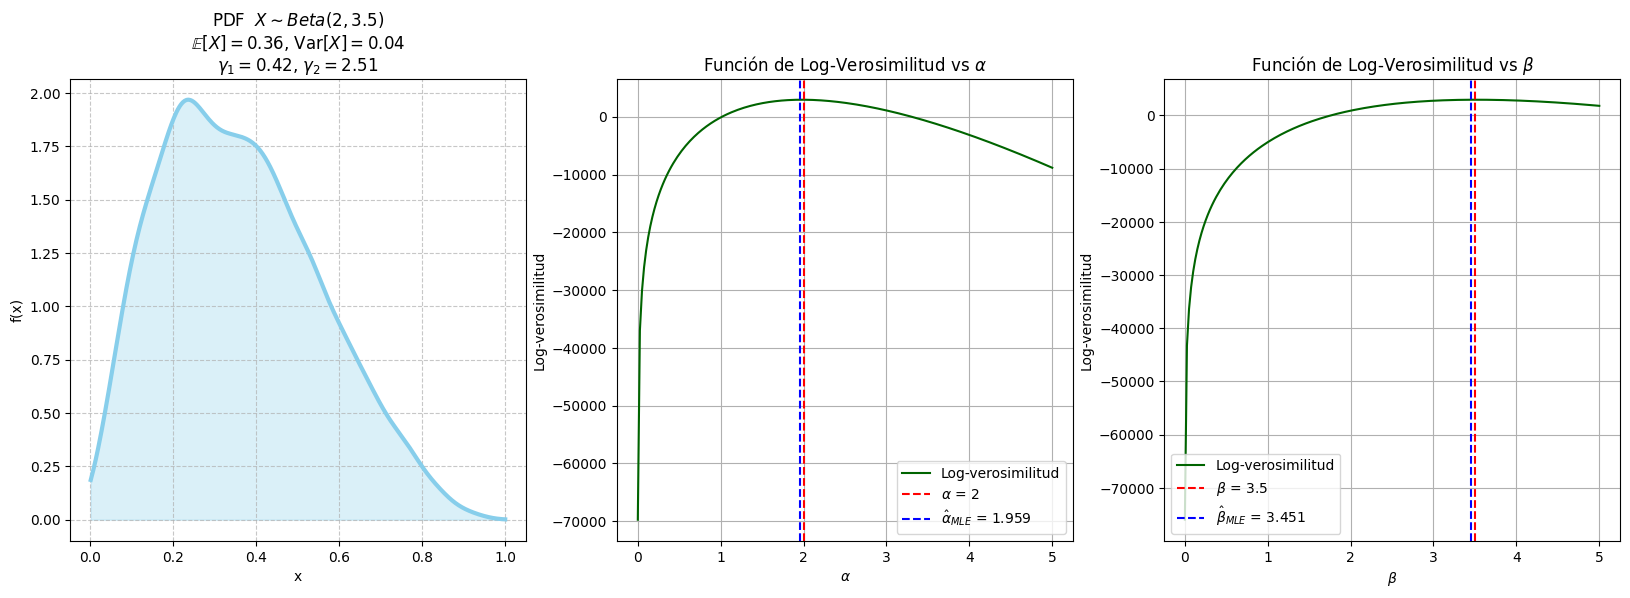

In [6]:
# Definimos los Parametros de la Distribucion

alpha_param = 2
beta_param = 3.5

# Definimos la Distribucion Aleatoria 

rv = beta(alpha_param, beta_param)

# Definimos el Dominio

x = np.linspace(0.001, 1, 500)

# Generamos 10.000 Muestras Provenientes de la Distribucion (Simulamos el concepto IID)

samples = rv.rvs(size = 10000)

# Definimos las Funciones PMF apartir de las Muestras

kde = gaussian_kde(samples)
pdf_vals = kde(x)

# Calculamos los Distintos Momentos

mean = np.mean(samples)
var = np.var(samples)
skewness = skew(samples)
kurt = kurtosis(samples, fisher = False)

# Definimos el Estimador de Parametro (Digamma no tiene inversa cerrada)

alpha_mle, beta_mle, _, _ = beta.fit(samples, floc = 0, fscale = 1)

# Definimos la Funcion Log-Verosimilitud 

alpha_values = np.linspace(0.001, 5, 200)
beta_values = np.linspace(0.001, 5, 200)

log_likelihood_alpha = np.array([(alpha_values - 1) * np.log(x) + (beta_param - 1) * np.log(1 - x) + gammalnfn(alpha_values + beta_param) - gammalnfn(alpha_values) - gammalnfn(beta_param) for x in samples]).sum(axis = 0)
log_likelihood_beta = np.array([(alpha_param - 1) * np.log(x) + (beta_values - 1) * np.log(1 - x) + gammalnfn(alpha_param + beta_values) - gammalnfn(alpha_param) - gammalnfn(beta_values) for x in samples]).sum(axis = 0)

# Visualizamos

fig, axs = plt.subplots(1, 3, figsize = (20, 6))

axs[0].plot(x, pdf_vals, color = 'skyblue', lw = 3)
axs[0].fill_between(x, pdf_vals, color = 'skyblue', alpha = 0.3)
axs[0].set_title(f'PDF  $X \\sim Beta({alpha_param}, {beta_param})$\n' f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' f'$\\gamma_1={float(skewness):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].grid(True, linestyle = '--', alpha = 0.7)

axs[1].plot(alpha_values, log_likelihood_alpha, label = 'Log-verosimilitud', color = 'darkgreen')
axs[1].axvline(x = alpha_param, color = 'red', linestyle = '--', label = f'$\\alpha$ = {alpha_param}')
axs[1].axvline(x = alpha_mle, color = 'blue', linestyle = '--', label = f'$\hat{{\\alpha}}_{{MLE}}$ = {alpha_mle:.3f}')
axs[1].set_title('Función de Log-Verosimilitud vs $\\alpha$')
axs[1].set_xlabel('$\\alpha$')
axs[1].set_ylabel('Log-verosimilitud')
axs[1].legend()
axs[1].grid(True)

axs[2].plot(beta_values, log_likelihood_beta, label = 'Log-verosimilitud', color = 'darkgreen')
axs[2].axvline(x = beta_param, color = 'red', linestyle = '--', label = f'$\\beta$ = {beta_param}')
axs[2].axvline(x= beta_mle, color = 'blue', linestyle = '--', label = f'$\hat{{\\beta}}_{{MLE}}$ = {beta_mle:.3f}')
axs[2].set_title('Función de Log-Verosimilitud vs $\\beta$')
axs[2].set_xlabel('$\\beta$')
axs[2].set_ylabel('Log-verosimilitud')
axs[2].legend()
axs[2].grid(True)

plt.show()

### **Gamma** 

**Simbologia** 

$$X \sim \Gamma(\alpha, \lambda)$$

**Funcion de Densidad de Probabilidad (PDF)**

$$f(x) = \frac{\lambda^{\alpha}}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\lambda x}$$

**Verosimilitud** 

$$L(\alpha, \lambda) = \prod_i^n \frac{\lambda^{\alpha}}{\Gamma(\alpha)} x_i^{\alpha - 1} e^{-\lambda x_i}$$


**Log-Verosimilitud** 

$$LL(\alpha, \lambda) = \sum_i^n \log\left(\frac{\lambda^{\alpha}}{\Gamma(\alpha)} x_i^{\alpha - 1} e^{-\lambda x_i}\right)$$
$$LL(\alpha, \lambda) = \sum_i^n \log \lambda^{\alpha} + \log x_i^{\alpha - 1} + \log e^{-\lambda x_i} - \log \Gamma(\alpha)$$
$$LL(\alpha, \lambda) = \sum_i^n \alpha \log \lambda + (\alpha - 1) \log x_i - \lambda x_i \log e - \log \Gamma(\alpha)$$
$$LL(\alpha, \lambda) = \sum_i^n \alpha \log \lambda + (\alpha - 1) \log x_i - \lambda x_i - \log \Gamma(\alpha)$$
$$LL(\alpha, \lambda) = \sum_i^n \alpha \log \lambda + \sum_i^n  (\alpha - 1) \log x_i - \sum_i^n  \lambda x_i - \sum_i^n \log \Gamma(\alpha)$$

**Definimos** 

$$z = \sum_i^n \log x_i$$

$$r = \sum_i^n x_i$$

$$\frac{\partial \Gamma(\theta)}{\partial \theta} = \psi(\theta)$$

**Entonces**

$$LL(\alpha, \lambda) = n \alpha \log \lambda + (\alpha - 1) z - \lambda r - n \log \Gamma(\alpha)$$

**Derivamos Pracialmente Respecto a los Parametros** 

* Parametro: $\alpha$ 

$$\frac{\partial LL(\alpha, \lambda)}{\partial \alpha} = n \log \lambda + z - n \psi(\alpha)$$

* Parametro: $\lambda$ 

$$\frac{\partial LL(\alpha, \lambda)}{\partial \lambda} = \frac{n \alpha}{\lambda} - r$$

**Máxima verosimilitud** 

* Parametro: $\alpha$ 

$$\hat{\alpha}_{MLE} = \text{argmax}_{\alpha} LL(\alpha, \lambda) \rightarrow \frac{\partial LL(\alpha, \lambda)}{\partial \alpha} = 0$$

$$0 = n \log \lambda + z - n \psi(\alpha)$$
$$\psi(\alpha) =  \frac{n \log \lambda + z}{n}$$
$$\psi(\alpha) =  \frac{n \log \lambda + \sum_i^n \log x_i}{n}$$

* Parametro: $\lambda$ 

$$\hat{\lambda}_{MLE} = \text{argmax}_{\lambda} LL(\alpha, \lambda) \rightarrow \frac{\partial LL(\alpha, \lambda)}{\partial \lambda} = 0$$

$$0 =  \frac{n \alpha}{\lambda} - r$$
$$\lambda = \frac{n \alpha}{r}$$
$$\lambda = \frac{n \alpha}{\sum_i^n x_i}$$



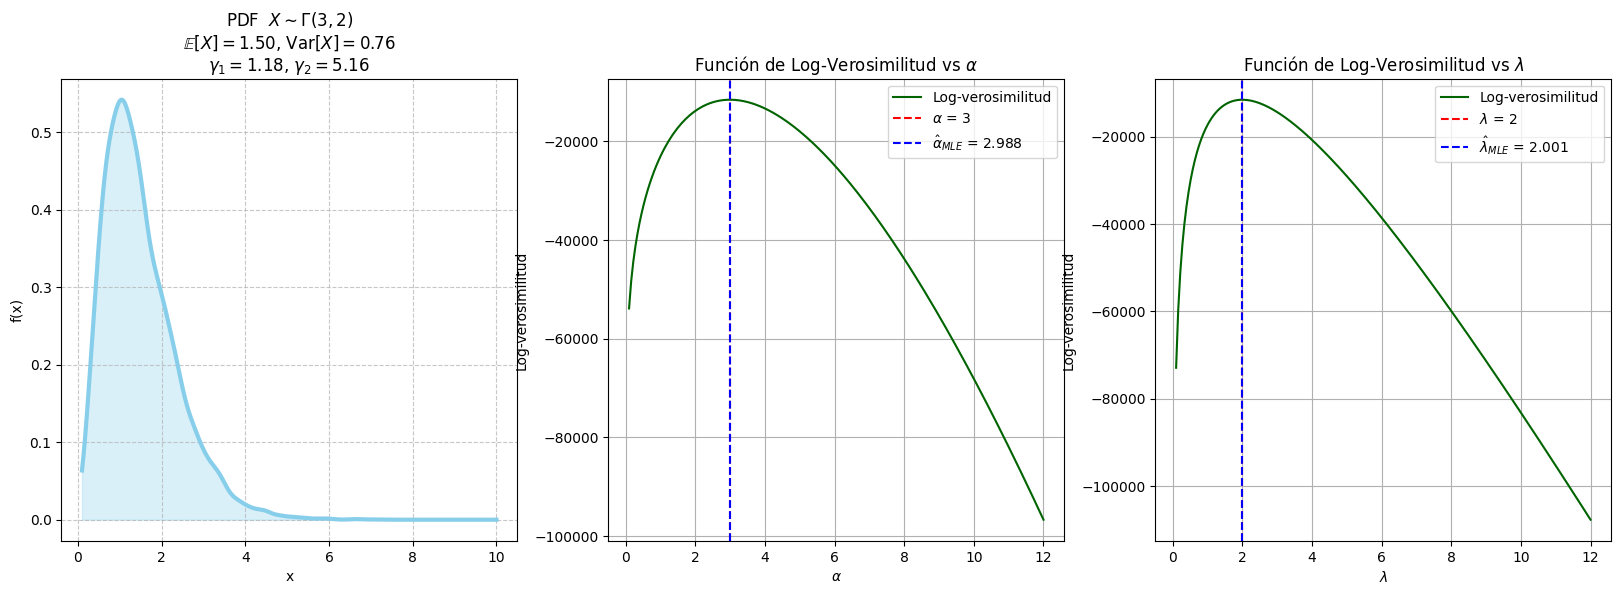

In [7]:
# Definimos los Parametros de la Distribucion

alpha_param = 3
lambda_param = 2

# Definimos la Distribucion Aleatoria 

rv = gamma(a = alpha_param, scale = 1/lambda_param)

# Definimos el Dominio

x = np.linspace(0.1, 10, 1000)

# Generamos 10.000 Muestras Provenientes de la Distribucion (Simulamos el concepto IID)

samples = rv.rvs(size = 10000)

# Definimos las Funciones PMF apartir de las Muestras

kde = gaussian_kde(samples)
pdf_vals = kde(x)

# Calculamos los Distintos Momentos

mean = np.mean(samples)
var = np.var(samples)
skewness = skew(samples)
kurt = kurtosis(samples, fisher = False)

# Definimos el Estimador de Parametro (Digamma no tiene inversa cerrada)

def mle_alpha_eq(alpha): 
    return np.log(len(samples) * alpha / np.sum(samples)) + np.sum(np.log(samples)) / len(samples) - digammafn(alpha)

alpha_mle = root_scalar(mle_alpha_eq, bracket=[0.1, 20], method='brentq').root
lambda_mle = ((len(samples) * alpha_param) / np.sum(samples))

# Definimos la Funcion Log-Verosimilitud 

alpha_values = np.linspace(0.1, 12, 200)
lambda_values = np.linspace(0.1, 12, 200)

log_likelihood_alpha = np.array([alpha_values * np.log(lambda_param) + (alpha_values - 1) * np.log(x) - lambda_param * x - gammalnfn(alpha_values) for x in samples]).sum(axis = 0)
log_likelihood_lambda = np.array([alpha_param * np.log(lambda_values) + (alpha_param - 1) * np.log(x) - lambda_values * x - gammalnfn(alpha_param) for x in samples]).sum(axis = 0)

# Visualizamos

fig, axs = plt.subplots(1, 3, figsize = (20, 6))

axs[0].plot(x, pdf_vals, color = 'skyblue', lw = 3)
axs[0].fill_between(x, pdf_vals, color = 'skyblue', alpha = 0.3)
axs[0].set_title(f'PDF  $X \\sim \Gamma({alpha_param}, {lambda_param})$\n' f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' f'$\\gamma_1={float(skewness):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].grid(True, linestyle = '--', alpha = 0.7)

axs[1].plot(alpha_values, log_likelihood_alpha, label = 'Log-verosimilitud', color = 'darkgreen')
axs[1].axvline(x = alpha_param, color = 'red', linestyle = '--', label = f'$\\alpha$ = {alpha_param}')
axs[1].axvline(x = alpha_mle, color = 'blue', linestyle = '--', label = f'$\hat{{\\alpha}}_{{MLE}}$ = {alpha_mle:.3f}')
axs[1].set_title('Función de Log-Verosimilitud vs $\\alpha$')
axs[1].set_xlabel('$\\alpha$')
axs[1].set_ylabel('Log-verosimilitud')
axs[1].legend()
axs[1].grid(True)

axs[2].plot(lambda_values, log_likelihood_lambda, label = 'Log-verosimilitud', color = 'darkgreen')
axs[2].axvline(x = lambda_param, color = 'red', linestyle = '--', label = f'$\\lambda$ = {lambda_param}')
axs[2].axvline(x= lambda_mle, color = 'blue', linestyle = '--', label = f'$\hat{{\\lambda}}_{{MLE}}$ = {lambda_mle:.3f}')
axs[2].set_title('Función de Log-Verosimilitud vs $\\lambda$')
axs[2].set_xlabel('$\\lambda$')
axs[2].set_ylabel('Log-verosimilitud')
axs[2].legend()
axs[2].grid(True)

plt.show()

# **Maximum a Posteriori (MAP)**

La **estimación máxima a posteriori** busca encontrar los parámetros desconocidos $\theta$ de un **modelo probabilístico** que son los **más probables** dado el conjunto de **datos observados y una distribución a priori** sobre los parámetros.

Supongamos que observamos una **muestra de datos** $x = (x_1, x_2, \dots, x_n)$ generada por una variable aleatoria $X$ con **función de probabilidad** (PMF o PDF) $f(x \mid \theta)$, donde $\theta$ representa los parámetros del modelo, y que ademas disponemos de una **distribucion a priori**  $p(\theta)$ sobre los parametros $\theta$

**Asumimos que los datos son:**

* Independientes 

* Idénticamente distribuidos (IID), es decir, cada $X_i \sim p(x \mid \theta)$.

Bajo esta suposicion, lo que buscamos es encontrar el parametro $\theta$ que **maximice** la **probabilidad a posteriori**, es decir, el valor mas probable para $\theta$ dados los **datos observados**

$$p(\theta \mid x)$$

Para la estimacion utilizaremos el **Teorema de Bayes** 

$$p(\theta \mid x) = \frac{p(\theta) \cdot p(x \mid \theta)}{p(x)}$$

Adicionalmente como los datos estan **identicamente distribuidos** (IID) podemos utilizar la **funcion de verosimilitud** 

$$p(\theta \mid x) = \frac{p(\theta) \cdot \prod_{i = 1}^n p(x_i \mid \theta)}{p(x)}$$

Tambien hay que tener en cuenta que **el denominador es constante** respecto a $\theta$ asi que lo podemos despreciar 

$$p(\theta \mid x) = p(\theta) \cdot \prod_{i = 1}^n p(x_i \mid \theta)$$

El **estimador maximum a posteriori** es el valor $\theta$ que maximiza esta funcion

$$\hat{\theta}_{MAP} = \text{argmax}_{\theta} p(\theta \mid x) = \text{argmax}_{\theta} p(\theta) \cdot \prod_{i = 1}^n p(x_i \mid \theta)$$

**Maximización del log-maximum a posteriori**: Debido a que el logaritmo es una función monótonamente creciente, **maximizar el maximum a posteriori** es equivalente a maximizar su logaritmo:

$$Lp(\theta \mid x) = \log p(\theta \mid x) = \log p(\theta) + \sum_{i = 1}^n  \log p(x_i  \mid \theta)$$
$$\hat{\theta}_{MAP} = \text{argmax}_{MAP} Lp(\theta \mid x) = \text{argmax}_{\theta} \log p(\theta) + \sum_{i = 1}^n  \log p(x_i \mid \theta)$$


### **Bernoulli**  

**Simbologia** 

$$X \sim \text{Bern}(p)$$

**Funcion de Masa de Probabilidad (PMF)**

$$f(x) = P(X = x) = p^x \cdot (1 - p)^{1 - x}$$ 

**Verosimilitud** 

$$L(p) = \prod_i^n p^{x_i} \cdot (1 - p)^{1 - x_i}$$

**Posteriori** 

$$L(p \mid x) = f(p) \cdot \prod_i^n p^{x_i} \cdot (1 - p)^{1 - x_i}$$

**Log-Posteriori** 

$$LL(p \mid x) = \log \left(f(p) \cdot \prod_i^n p^{x_i} \cdot (1 - p)^{1 - x_i}\right)$$
$$LL(p \mid x) = \log f(p) + \sum_i^n \log \left(p^{x_i} \cdot (1 - p)^{1 - x_i}\right)$$

**Priori Distribucion Beta** 

$$LL(p \mid x) = \log \left(\frac{p^{\alpha - 1} (1 - p)^{\beta - 1}}{{B(\alpha, \beta)}}\right)  + \sum_i^n \log \left(p^{x_i} \cdot (1 - p)^{1 - x_i}\right)$$
$$LL(p \mid x) = (\alpha - 1) \log p + (\beta - 1) \log (1 - p) - \log B(\alpha, \beta)   + \sum_i^n \log \left(p^{x_i} \cdot (1 - p)^{1 - x_i}\right)$$

**Definimos** 

$$z = \sum_i^n x_i$$

**Derivamos Pracialmente Respecto a los Parametros (Parte Bernoulli, Es la misma que en MLE)** 

$$\frac{\partial LL(p \mid x)}{\partial p} = \frac{z}{p} - \frac{n - z}{1 - p}$$

**Derivamos Pracialmente Respecto a los Parametros (Parte Priori)** 

$$\frac{\partial LL(p \mid x)}{\partial p} = \frac{\alpha - 1}{p} - \frac{\beta - 1}{1 - p}$$

**Derivamos Pracialmente Respecto a los Parametros (Union)** 

$$\frac{\partial LL(p \mid x)}{\partial p} = \frac{\alpha - 1}{p} - \frac{\beta - 1}{1 - p} + \frac{z}{p} - \frac{n - z}{1 - p}$$

**Máxima a Posteriori** 

$$\hat{p}_{MAP} = \text{argmax}_{p} LL(p \mid x) \rightarrow \frac{\partial LL(p \mid x)}{\partial p} = 0$$

$$0 = \frac{\alpha - 1}{p} - \frac{\beta - 1}{1 - p} + \frac{z}{p} - \frac{n - z}{1 - p}$$


$$\hat{p} = \frac{\alpha + z - 1}{\alpha + \beta + n - 2}$$
$$\hat{p} = \frac{\alpha + \sum_i^n x_i - 1}{\alpha + \beta + n - 2}$$

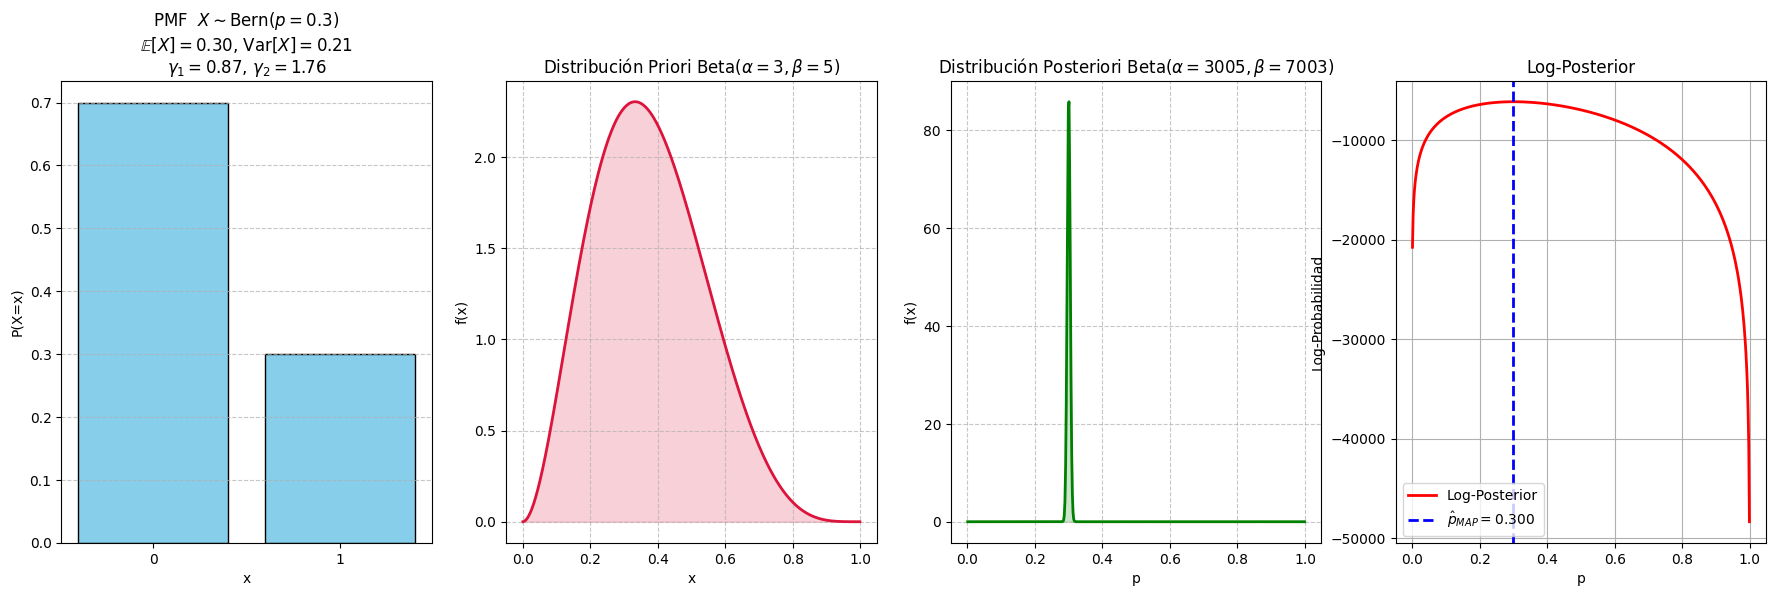

In [8]:
# Definimos los Parametros de la Distribucion

p_param = 0.3

# Definimos la Distribucion Aleatoria 

rv = bernoulli(p_param)

# Definimos el Dominio

x = np.array([0, 1])

# Generamos 10.000 Muestras Provenientes de la Distribucion (Simulamos el concepto IID)

samples = rv.rvs(size = 10000)

# Definimos las Funciones PMF apartir de las Muestras

pmf_vals = np.array([np.mean(samples == val) for val in x])

# Calculamos los Distintos Momentos

mean = np.mean(samples)
var = np.var(samples)
skewness = skew(samples)
kurt = kurtosis(samples, fisher = False)

# Definimos la Distribucion a Priori

alpha_prior = 3
beta_prior = 5

p = np.linspace(0.001, 0.999, 500)
prior_pdf = beta.pdf(p, alpha_prior, beta_prior)

# Definimos la Distribucion a Posteriori 

alpha_posteriori = alpha_prior + np.sum(samples)
beta_posteriori  = beta_prior + len(samples) - np.sum(samples)

posterior_pdf = beta.pdf(p, alpha_posteriori, beta_posteriori)

# Definimos el Estimador de Parametro 

p_map = (alpha_prior + np.sum(samples) - 1) / (alpha_prior + beta_prior + len(samples) - 2)

# Log-posteriori 

log_posterior = ((alpha_prior - 1) * np.log(p) + (beta_prior - 1) * np.log(1 - p) - np.log(betafn(alpha_prior, beta_prior))) + np.array([x * np.log(p)+ (1 - x) * np.log(1 - p) for x in samples]).sum(axis = 0)

# Visualizamos

fig, axs = plt.subplots(1, 4, figsize = (22, 6))

axs[0].bar(x, pmf_vals, color = 'skyblue', edgecolor = 'black')
axs[0].set_title(f'PMF  $X \\sim \\text{{Bern}}(p={p_param})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skewness):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0].set_xticks(x)
axs[0].set_xlabel('x')
axs[0].set_ylabel('P(X=x)')
axs[0].grid(True, axis = 'y', linestyle = '--', alpha = 0.7)

axs[1].plot(p, prior_pdf, color = 'crimson', lw = 2)
axs[1].fill_between(p, 0, prior_pdf, color = 'crimson', alpha = 0.2)
axs[1].set_title(f'Distribución Priori $\\text{{Beta}}(\\alpha={alpha_prior}, \\beta={beta_prior})$')
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].grid(True, linestyle = '--', alpha = 0.7)

axs[2].plot(p, posterior_pdf, color = 'green', lw = 2)
axs[2].fill_between(p, 0, posterior_pdf, color = 'green', alpha = 0.2)
axs[2].set_title(f'Distribución Posteriori $\\text{{Beta}}(\\alpha={alpha_posteriori}, \\beta={beta_posteriori})$')
axs[2].set_xlabel('p')
axs[2].set_ylabel('f(x)')
axs[2].grid(True, linestyle = '--', alpha = 0.7)

axs[3].plot(p, log_posterior, label='Log-Posterior', color='red', linewidth=2)
axs[3].axvline(p_map, color = 'blue', linestyle = '--', lw = 2, label = f'$\hat{{p}}_{{MAP}} = {p_map:.3f}$')
axs[3].set_title('Log-Posterior')
axs[3].set_xlabel('p')
axs[3].set_ylabel('Log-Probabilidad')
axs[3].legend()
axs[3].grid(True)

plt.show()

### **Poisson** 

**Simbologia** 

$$X \sim \text{Pois}(\lambda)$$

**Funcion de Masa de Probabilidad (PMF)**

$$f(x) = P(X = x) = \frac{\lambda^x \cdot e^{-\lambda}}{x!}$$

**Verosimilitud** 

$$L(\lambda) = \prod_i^n \frac{\lambda^{x_i} \cdot e^{-\lambda}}{x_i!}$$

**Posteriori** 

$$L(\lambda \mid x) = f(\lambda) \cdot \prod_i^n \frac{\lambda^{x_i} \cdot e^{-\lambda}}{x_i!}$$

**Log-Posteriori** 

$$LL(\lambda \mid x) = \log \left(f(\lambda) \cdot \prod_i^n \frac{\lambda^{x_i} \cdot e^{-\lambda}}{x_i!}\right)$$
$$LL(\lambda \mid x) = \log f(\lambda) + \sum_i^n \log \left(\frac{\lambda^{x_i} \cdot e^{-\lambda}}{x_i!}\right)$$

**Priori Distribucion Gamma** $\Gamma(\alpha, \beta)$

$$LL(\lambda \mid x) = \log \left(\frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda^{\alpha - 1} e^{-\beta \lambda}\right)  + \sum_i^n \log \left(\frac{\lambda^{x_i} \cdot e^{-\lambda}}{x_i!}\right)$$
$$LL(\lambda \mid x) = \alpha \log \beta + (\alpha - 1) \log \lambda - \beta \lambda - \log \Gamma(\alpha)  + \sum_i^n \log \left(\frac{\lambda^{x_i} \cdot e^{-\lambda}}{x_i!}\right)$$

**Definimos** 

$$z = \sum_i^n x_i$$

**Derivamos Pracialmente Respecto a los Parametros (Parte Poisson, Es la misma que en MLE)** 

$$\frac{\partial LL(\lambda \mid x)}{\partial \lambda} = \frac{z}{\lambda} - n$$

**Derivamos Pracialmente Respecto a los Parametros (Parte Priori)** 

$$\frac{\partial LL(\lambda \mid x)}{\partial \lambda} = \frac{\alpha - 1}{\lambda} - \beta$$

**Derivamos Pracialmente Respecto a los Parametros (Union)** 

$$\frac{\partial LL(\lambda \mid x)}{\partial \lambda} = \frac{\alpha - 1}{\lambda} - \beta + \frac{z}{\lambda} - n$$

**Máxima a Posteriori** 

$$\hat{\lambda}_{MAP} = \text{argmax}_{\lambda} LL(\lambda \mid x) \rightarrow \frac{\partial LL(\lambda \mid x)}{\partial \lambda} = 0$$

$$0 = \frac{\alpha - 1}{\lambda} - \beta + \frac{z}{\lambda} - n$$


$$\hat{\lambda} = \frac{\alpha + z - 1}{\beta + n}$$
$$\hat{\lambda} = \frac{\alpha + \sum_i^n x_i - 1}{\beta + n}$$

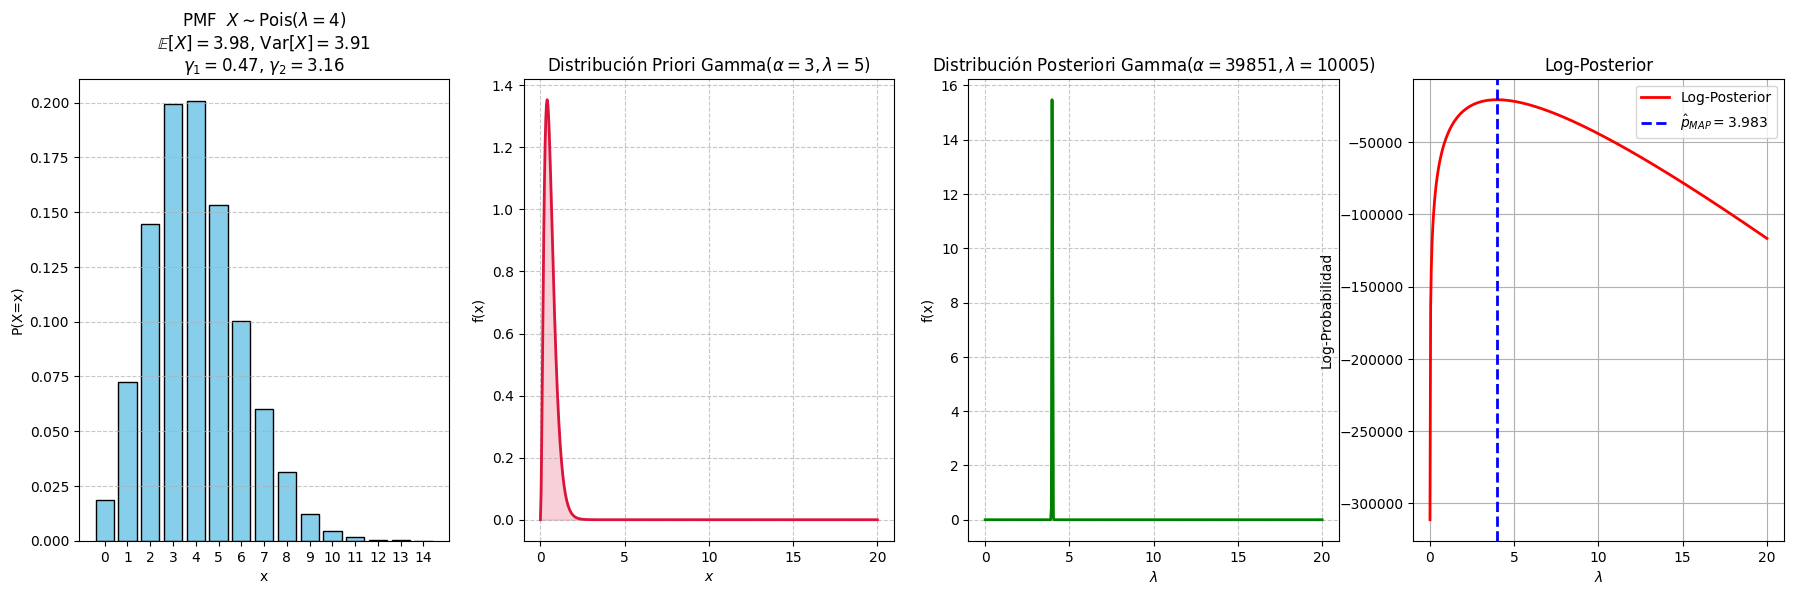

In [9]:
# Definimos los Parametros de la Distribucion

lambda_param = 4

# Definimos la Distribucion Aleatoria 

rv = poisson(lambda_param)

# Definimos el Dominio

x = np.arange(0, 15)

# Generamos 10.000 Muestras Provenientes de la Distribucion (Simulamos el concepto IID)

samples = rv.rvs(size = 10000)

# Definimos las Funciones PMF apartir de las Muestras

pmf_vals = np.array([np.mean(samples == val) for val in x])

# Calculamos los Distintos Momentos

mean = np.mean(samples)
var = np.var(samples)
skewness = skew(samples)
kurt = kurtosis(samples, fisher = False)

# Definimos la Distribucion a Priori

alpha_prior = 3
lambda_prior = 5

lambda_ = np.linspace(0.001, 20, 500)
prior_pdf = gamma.pdf(lambda_, a = alpha_prior, scale = 1 / lambda_prior)

# Definimos la Distribucion a Posteriori 

alpha_posteriori = alpha_prior + np.sum(samples)
lambda_posteriori  = lambda_prior + len(samples)

posterior_pdf = gamma.pdf(lambda_, a = alpha_posteriori, scale = 1 / lambda_posteriori)

# Definimos el Estimador de Parametro 

p_map = (alpha_prior + np.sum(samples) - 1) / (lambda_prior + len(samples))

# Log-posteriori 

log_posterior = (alpha_prior * np.log(lambda_prior) + (alpha_prior - 1) * np.log(lambda_) - lambda_prior * lambda_ - np.log(gammafn(alpha_prior))) + np.array([x * np.log(lambda_) + (-lambda_) - np.log(math.factorial(x)) for x in samples]).sum(axis=0)

# Visualizamos

fig, axs = plt.subplots(1, 4, figsize = (22, 6))

axs[0].bar(x, pmf_vals, color = 'skyblue', edgecolor = 'black')
axs[0].set_title(f'PMF  $X \\sim \\text{{Pois}}(\lambda={lambda_param})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skewness):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0].set_xticks(x)
axs[0].set_xlabel('x')
axs[0].set_ylabel('P(X=x)')
axs[0].grid(True, axis = 'y', linestyle = '--', alpha = 0.7)

axs[1].plot(lambda_, prior_pdf, color = 'crimson', lw = 2)
axs[1].fill_between(lambda_, 0, prior_pdf, color = 'crimson', alpha = 0.2)
axs[1].set_title(f'Distribución Priori $\\text{{\Gamma}}(\\alpha={alpha_prior}, \\lambda={lambda_prior})$')
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('f(x)')
axs[1].grid(True, linestyle = '--', alpha = 0.7)

axs[2].plot(lambda_, posterior_pdf, color = 'green', lw = 2)
axs[2].fill_between(lambda_, 0, posterior_pdf, color = 'green', alpha = 0.2)
axs[2].set_title(f'Distribución Posteriori $\\text{{\Gamma}}(\\alpha={alpha_posteriori}, \\lambda={lambda_posteriori})$')
axs[2].set_xlabel('$\lambda$')
axs[2].set_ylabel('f(x)')
axs[2].grid(True, linestyle = '--', alpha = 0.7)

axs[3].plot(lambda_, log_posterior, label='Log-Posterior', color='red', linewidth=2)
axs[3].axvline(p_map, color = 'blue', linestyle = '--', lw = 2, label = f'$\hat{{p}}_{{MAP}} = {p_map:.3f}$')
axs[3].set_title('Log-Posterior')
axs[3].set_xlabel('$\lambda$')
axs[3].set_ylabel('Log-Probabilidad')
axs[3].legend()
axs[3].grid(True)

plt.show()

### **Normal**

**Simbologia** 

$$X \sim {\displaystyle {\mathcal {N}}(\mu ,\sigma ^{2})}$$

**Funcion de Densidad de Probabilidad (PDF)**

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

**Verosimilitud** 

$$L(\mu, \sigma^2) = \prod_i^n \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}$$

**Posteriori** 

$$L(\mu \mid x) = f(\mu) \cdot \prod_i^n \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}$$

**Log-Posteriori** 

$$LL(\mu \mid x) = \log \left(f(\mu) \cdot \prod_i^n \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}\right)$$
$$LL(\mu \mid x) = \log f(\mu) + \sum_i^n \log \left(\frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}\right)$$

**Priori Distribucion Normal** $X \sim {\displaystyle {\mathcal {N}}(\mu_0 ,\sigma_0 ^{2})}$

$$LL(\mu \mid x) = \log \left(\frac{1}{\sqrt{2\pi\sigma_0^2}} \cdot e^{-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}}\right)  + \sum_i^n \log \left(\frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}\right)$$
$$LL(\mu \mid x) = -\frac{(\mu - \mu_0)^2}{2\sigma_0^2} - \frac{1}{2} \log 2 \pi \sigma_0^2  + \sum_i^n \log \left(\frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}\right)$$

**Definimos** 

$$z = \sum_i^n x_i$$

**Derivamos Pracialmente Respecto a los Parametros (Parte Normal, Es la misma que en MLE)** 

$$\frac{\partial LL(\mu \mid x)}{\partial \mu} = \frac{1}{\sigma^2} \cdot (z - n \mu)$$

**Derivamos Pracialmente Respecto a los Parametros (Parte Priori)** 

$$\frac{\partial LL(\mu \mid x)}{\partial \mu} = \frac{\mu_0 - \mu}{\sigma_0^2}$$

**Derivamos Pracialmente Respecto a los Parametros (Union)** 

$$\frac{\partial LL(\mu \mid x)}{\partial \mu} = \frac{\mu_0 - \mu}{\sigma_0^2} + \frac{1}{\sigma^2} \cdot (z - n \mu)$$

**Máxima a Posteriori** 

$$\hat{\mu}_{MAP} = \text{argmax}_{\mu} LL(\mu \mid x) \rightarrow \frac{\partial LL(\mu \mid x)}{\partial \mu} = 0$$

$$0 = \frac{\mu_0 - \mu}{\sigma_0^2} + \frac{1}{\sigma^2} \cdot (z - n \mu)$$

$$\hat{\mu} = \frac{\sigma^2 \mu_0 + \sigma_0^2 z}{\sigma_0^2 n + \sigma^2}$$
$$\hat{\mu} = \frac{\sigma^2 \mu_0 + \sigma_0^2 \sum_i^n x_i}{\sigma_0^2 n + \sigma^2}$$

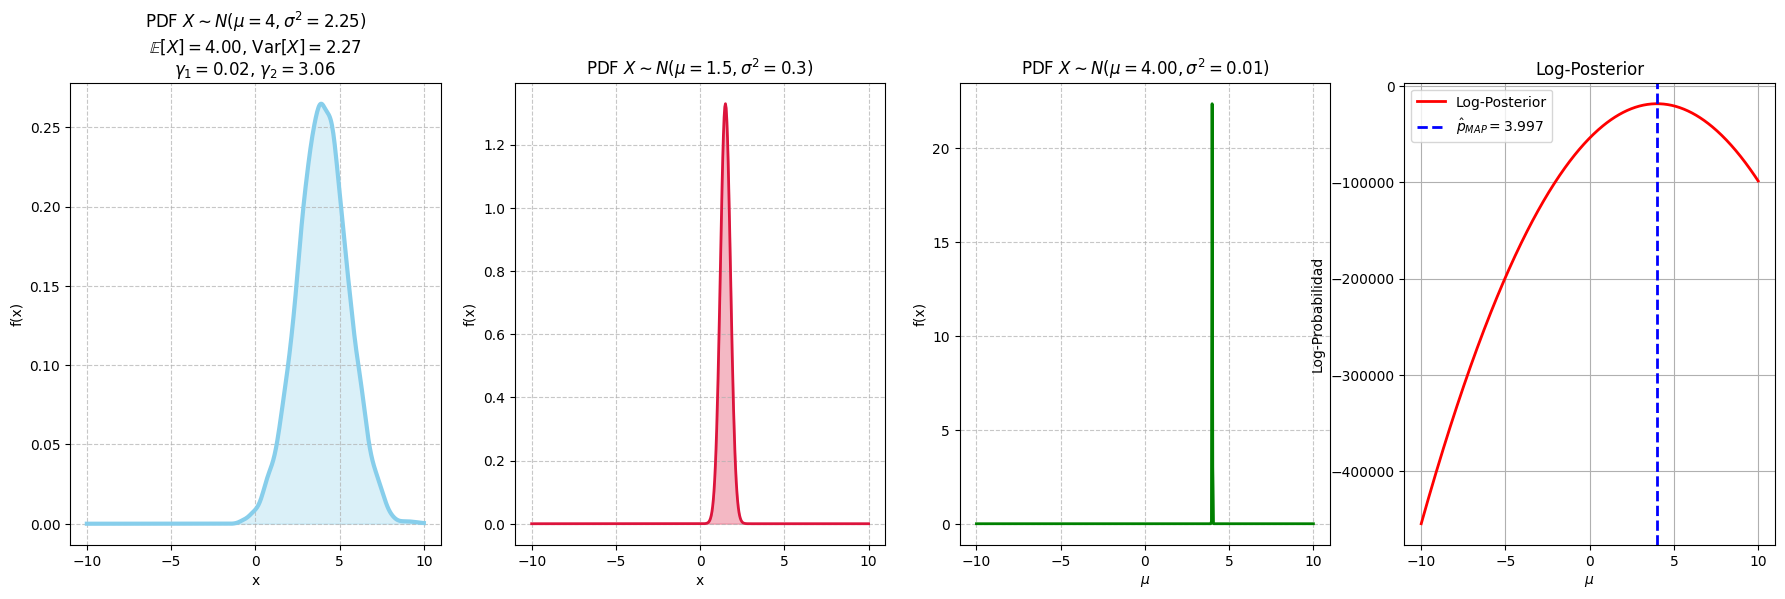

In [10]:
# Definimos los Parametros de la Distribucion

mu_param = 4
sigma_param = 1.5

# Definimos la Distribucion Aleatoria 

rv = norm(mu_param, sigma_param)

# Definimos el Dominio

x = np.linspace(-10, 10, 500)

# Generamos 10.000 Muestras Provenientes de la Distribucion (Simulamos el concepto IID)

samples = rv.rvs(size = 10000)

# Definimos las Funciones PDF apartir de las Muestras

kde = gaussian_kde(samples)
pdf_vals = kde(x)

# Calculamos los Distintos Momentos

mean = np.mean(samples)
var = np.var(samples)
skewness = skew(samples)
kurt = kurtosis(samples, fisher = False)

# Definimos la Distribucion a Priori

mu_prior = 1.5
sigma_prior = 0.3

mu_ = np.linspace(-10, 10, 500)

prior_pdf = norm.pdf(mu_, loc = mu_prior, scale = sigma_prior)

# Definimos la Distribucion a Posteriori 

mu_posteriori = 1 / ((len(samples) / sigma_param**2) + (1 / sigma_prior**2)) * ((mean * len(samples) / sigma_param**2) + (mu_prior / sigma_prior**2))
sigma_posteriori  = np.sqrt(1 / ((len(samples) / sigma_param**2) + (1 / sigma_prior**2)))

posterior_pdf = norm.pdf(mu_, loc = mu_posteriori, scale = sigma_posteriori)

# Definimos el Estimador de Parametro 

p_map = (sigma_param**2 * mu_prior + sigma_prior**2 * np.sum(samples)) / (sigma_prior**2 * len(samples) + sigma_param**2)

# Log-posteriori 

log_posterior = - ((mu_ - mu_prior)**2 / (2 * sigma_prior**2)) - 0.5 * np.log(2 * np.pi * sigma_prior**2) + np.array([- ((x - mu_)**2 / (2 * sigma_param**2)) - 0.5 * np.log(2 * np.pi * sigma_param**2) for x in samples]).sum(axis = 0)

# Visualizamos

fig, axs = plt.subplots(1, 4, figsize = (22, 6))

axs[0].plot(x, pdf_vals, color = 'skyblue', lw = 3)
axs[0].fill_between(x, pdf_vals, color = 'skyblue', alpha = 0.3)
axs[0].set_title(f'PDF $X \sim N(\mu = {mu_param},\sigma ^{2} = {sigma_param**2})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skewness):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].grid(True, linestyle = '--', alpha = 0.7)

axs[1].plot(x, prior_pdf, color = 'crimson', lw = 2)
axs[1].fill_between(x, prior_pdf, color = 'crimson', alpha = 0.3)
axs[1].set_title(f'PDF $X \sim N(\mu = {mu_prior},\sigma ^{2} = {sigma_prior})$')
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].grid(True, linestyle = '--', alpha = 0.7)

axs[2].plot(mu_, posterior_pdf, color = 'green', lw = 2)
axs[2].fill_between(mu_, posterior_pdf, color = 'green', alpha = 0.3)
axs[2].set_title(f'PDF $X \sim N(\mu = {mu_posteriori:0.2f},\sigma ^{2} = {sigma_posteriori:0.2f})$')
axs[2].set_xlabel('$\mu$')
axs[2].set_ylabel('f(x)')
axs[2].grid(True, linestyle = '--', alpha = 0.7)

axs[3].plot(mu_, log_posterior, label='Log-Posterior', color='red', linewidth=2)
axs[3].axvline(p_map, color = 'blue', linestyle = '--', lw = 2, label = f'$\hat{{p}}_{{MAP}} = {p_map:.3f}$')
axs[3].set_title('Log-Posterior')
axs[3].set_xlabel('$\mu$')
axs[3].set_ylabel('Log-Probabilidad')
axs[3].legend()
axs[3].grid(True)

plt.show()